<a href="https://colab.research.google.com/github/palpitation0/Machine-Learning-homework/blob/master/5%EA%B0%95_%EA%B3%BC%EC%A0%9C(%EB%AC%B8%EC%A0%9C_1%2C2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 1.

In [0]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from scipy.stats import norm 

In [0]:
mu=0
var=2
sigma = np.sqrt(var)

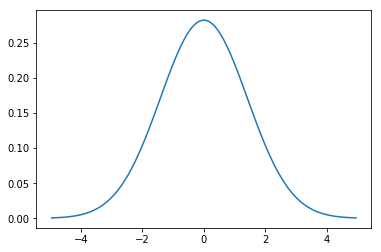

In [12]:
x = np.linspace(mu-3.5*sigma, mu+3.5*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma))

In [0]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

In [0]:
def multivariate_normal_pdf(X,mean,sigma) :
  P=X.shape[1]
  det = np.linalg.det(sigma)
  norm_const = 1/(((2*np.pi)**(P/2))*np.sqrt(det))
  X_mu = X - mean
  inv = np.linalg.inv(sigma)
  d2 = np.sum(np.dot(X_mu, inv)*X_mu, axis=1)
  return norm_const*np.exp(-0.5*d2)


In [0]:
mean=np.array([0,0])
sigma=np.array([[1,-0.5],[-0.5,1]])

In [0]:
x,y = np.mgrid[-3:3:.1, -3:3:.1]
X=np.stack((x.ravel(), y.ravel())).T
norm = multivariate_normal_pdf(X, mean, sigma).reshape(x.shape)

In [0]:
norm_scpy = multivariate_normal(mean, sigma).pdf(np.stack((x, y), axis=2))
assert np.allclose(norm, norm_scpy)

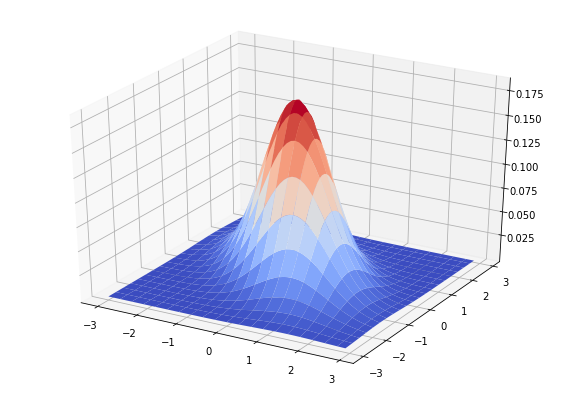

In [19]:
fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, norm, rstride=3, cstride=3, 
                       cmap=plt.cm.coolwarm, linewidth=1)

# 문제 2.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
linalg = np.linalg

In [0]:
N = 100
mean = [1,1]
cov = [[1, 0.8],[0.8, 1]]

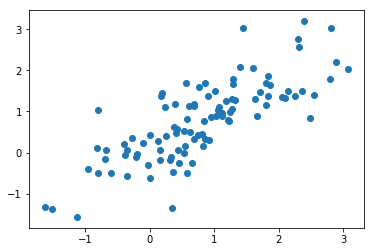

In [49]:
data = np.random.multivariate_normal(mean, cov, N)
plt.scatter(data[:,0], data[:,1])

In [63]:
data[:5]

array([[-0.02416105, -0.30396847],
       [ 2.791212  ,  1.79798431],
       [ 0.53016402, -0.01331868],
       [-0.68049394,  0.06870394],
       [ 0.8391402 ,  0.76701105]])

In [53]:
x_bar = data.mean(axis=0)
print(x_bar)

[0.79674705 0.77422325]


In [54]:
np.array([1,1]) - x_bar

array([0.20325295, 0.22577675])

In [0]:
from sklearn.covariance import EmpiricalCovariance

In [56]:
EmpCov = EmpiricalCovariance().fit(data)
EmpCov.covariance_

array([[0.99839628, 0.75183379],
       [0.75183379, 0.91349086]])

In [57]:
cov - EmpCov.covariance_

array([[0.00160372, 0.04816621],
       [0.04816621, 0.08650914]])

In [0]:
import scipy

In [59]:
Sinv = scipy.linalg.inv(EmpCov.covariance_)
print(Sinv)

[[ 2.63427075 -2.16809369]
 [-2.16809369  2.87911595]]


In [0]:
def d_mahal(k) :
  return scipy.spatial.distance.mahalanobis(k, x_bar, cov)

In [96]:
d_mahal(mean)

0.407075622098436

In [0]:
def d_euclid(k) :
  return scipy.spatial.distance.euclidean(k, x_bar)

In [98]:
d_euclid(mean)

0.3037875896090489

In [0]:
df = pd.DataFrame({'mahal':[], 'euclid':[]})
for i in range(100):
  df = df.append({'mahal':d_mahal(data[i].tolist()), 'euclid':d_euclid(data[i].tolist())},
                ignore_index = True)

In [108]:
df.head()

,mahal,euclid
0,1.803480,1.355134
1,2.879748,2.241869
2,1.013509,0.831438
3,2.085079,1.637070
4,0.036878,0.043002
